# The difference between the Edelweiss resolution function and the true Yield variance

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import h5py
import numpy as np
import pandas as pd

import sys
sys.path.append('../python/')
from EdwRes import *
from prob_dist import *

In [2]:
# get the data
# the posterior distribution is in samples
filename = 'data/edelweiss_C_systematicErrors_sampler_nll_allpars_gausPrior.h5'
f = h5py.File(filename,'r')

# need to store data in an array:
# The sampler will now have a chains attribute 
# which is an array with shape (Nwalker,N,Ndim) 
# where N is the number of interations (500 in our inital run)
# and Ndim is the number of fit parameters
path='{}/{}/'.format('mcmc','sampler')

aH = np.asarray(f[path+'aH'])
C = np.asarray(f[path+'C'])
m = np.asarray(f[path+'m'])
scale = np.asarray(f[path+'scale'])
A = np.asarray(f[path+'A'])
B = np.asarray(f[path+'B'])
samples = np.asarray(f[path+'samples'])

f.close()

# random walks starting near the minimum
ndim, nwalkers = 6, 100

(100, 500, 6)
(100, 500)


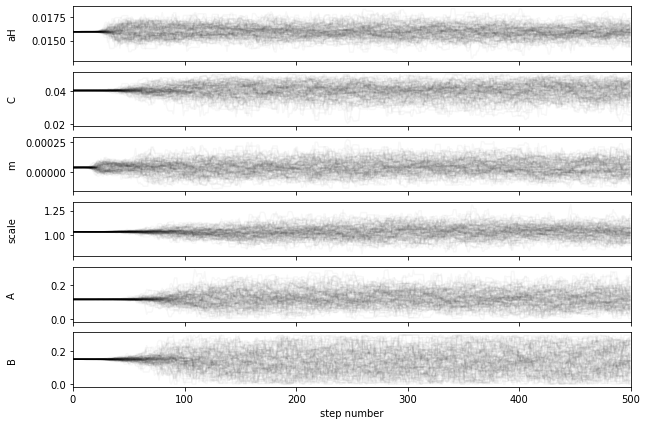

In [3]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)

print (np.shape(samples))
print (np.shape(samples[:, :, 1]))
labels = ["aH", "C", "m", "scale", "A", "B"]
for i in range(ndim):
    ax = axes[i]
    # when you pass ax.plot a pair, the columns represent seperate data sets
    ax.plot(np.transpose(samples[:, :, i]), "k", alpha=0.03)
    ax.set_xlim(0, np.shape(samples)[1])
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [4]:
# reshape the samples
samples = samples[:, 300:, :].reshape((-1, ndim))
print(len(samples))

20000


In [5]:
# We'll look at the Er values of the data points
# import data from Edelweiss
resNR_data = pd.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

# the sorting is necessary!
# otherwise the mask defined below will select the wrong data
resNR_data = resNR_data.sort_values(by='E_recoil')
NR_data = {'Erecoil': resNR_data["E_recoil"][2::], 'sigma': resNR_data["sig_NR"][2::], 'sigma_err': resNR_data["sig_NR_err"][2::]}
Er = NR_data['Erecoil']
print (len(samples))
print(np.random.randint(len(samples), size=10))

for aH, C, m, scale, A, B in samples[np.random.randint(len(samples), size=100)]:
    # GGA3 parameters from Edelweiss tables
    ion_center_0keV = 1.3
    ion_guard_0keV = 1.5
    heat_0keV = 0.4
    ion_122keV = 3.1 
    heat_122keV = 2.7
    par_dict = {'V' : scale*4.0,'eps_eV' : 3.0, 'a': A, 'b': B}
    
    #sigER_func = get_sig_gamma_func(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, \
    #                                par_dict, aH)
    
    sigNR_func = get_sig_nuc_func_alt(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, \
                                      par_dict, aH, C=0, m=0)
    sig_estimate = sigNR_func(Er)
    
    sig_real = []
    for Er_val in Er:
        sig_real.append(sigmomEdw(Er_val, band='NR', F=0.000001, V=scale*4.0, aH=aH, alpha=(1/100), A=A, B=B))

20000
[17986 14315 17340 14897 14281  1382 15367  9767  6458 11186]


../python\prob_dist.py:390: RuntimeWarning: invalid value encountered in sqrt
  return (np.sqrt(q2-mean**2))
../python\prob_dist.py:76: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Y_Er = lambda Y,Etr: quad(Y_Erdist, Etr-widthfac*new_width(Etr), Etr+widthfac*new_width(Etr),limit=100,args=(Y,Etr,))[0]


KeyboardInterrupt: 